In [2]:
import nbsetup
from models.sparc.result import Result

In [3]:
from references.sparc import adjustment_df
adjs = adjustment_df()

In [4]:
sparc = Result(adjustments=adjs.query("Source=='SPARC'"))

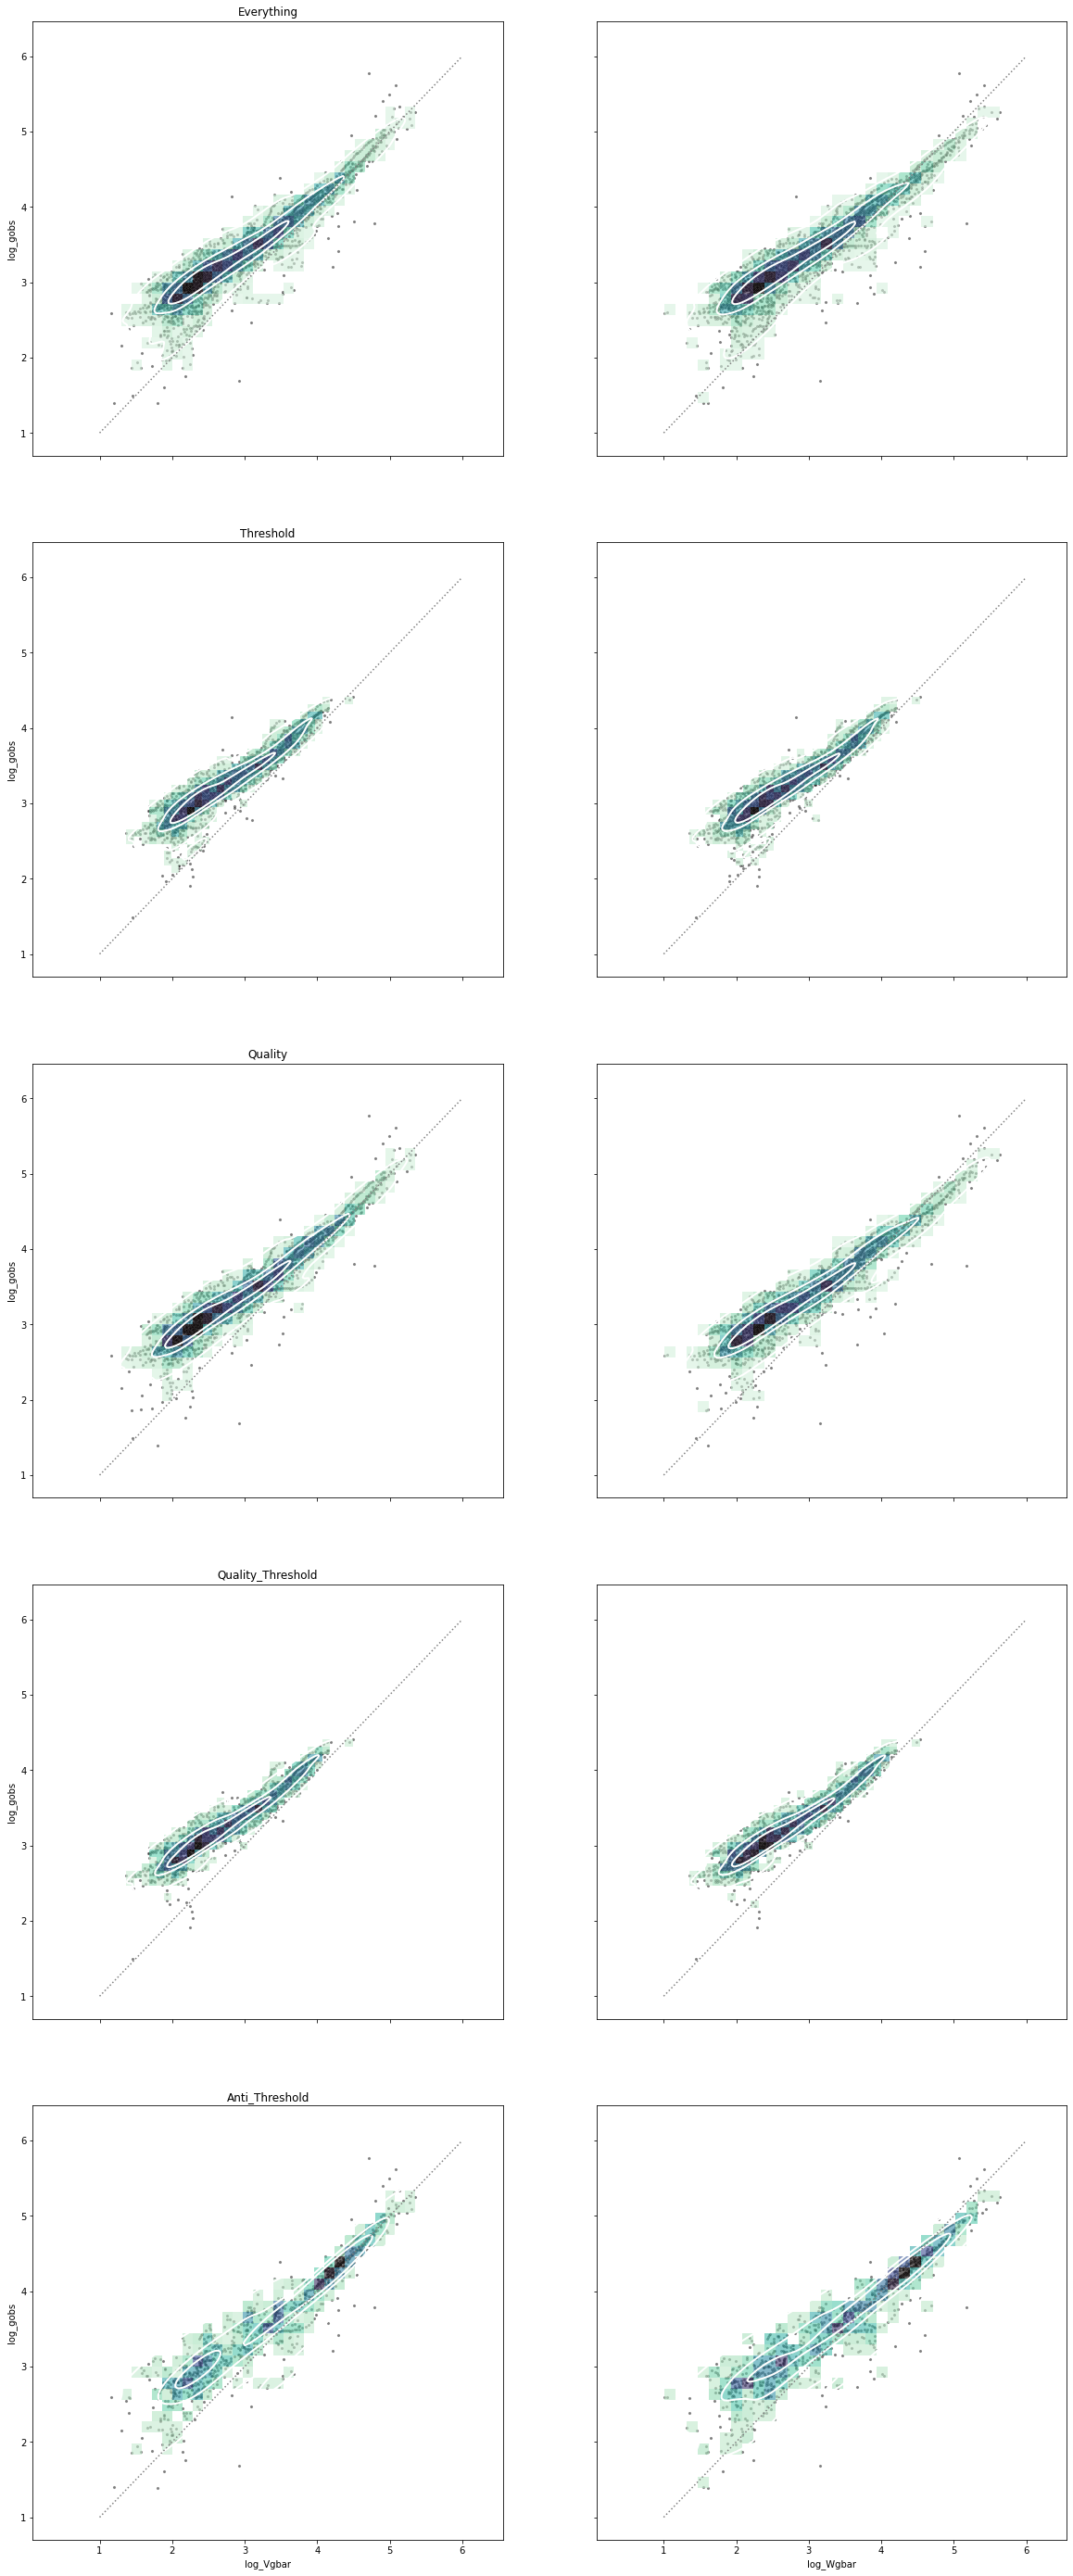

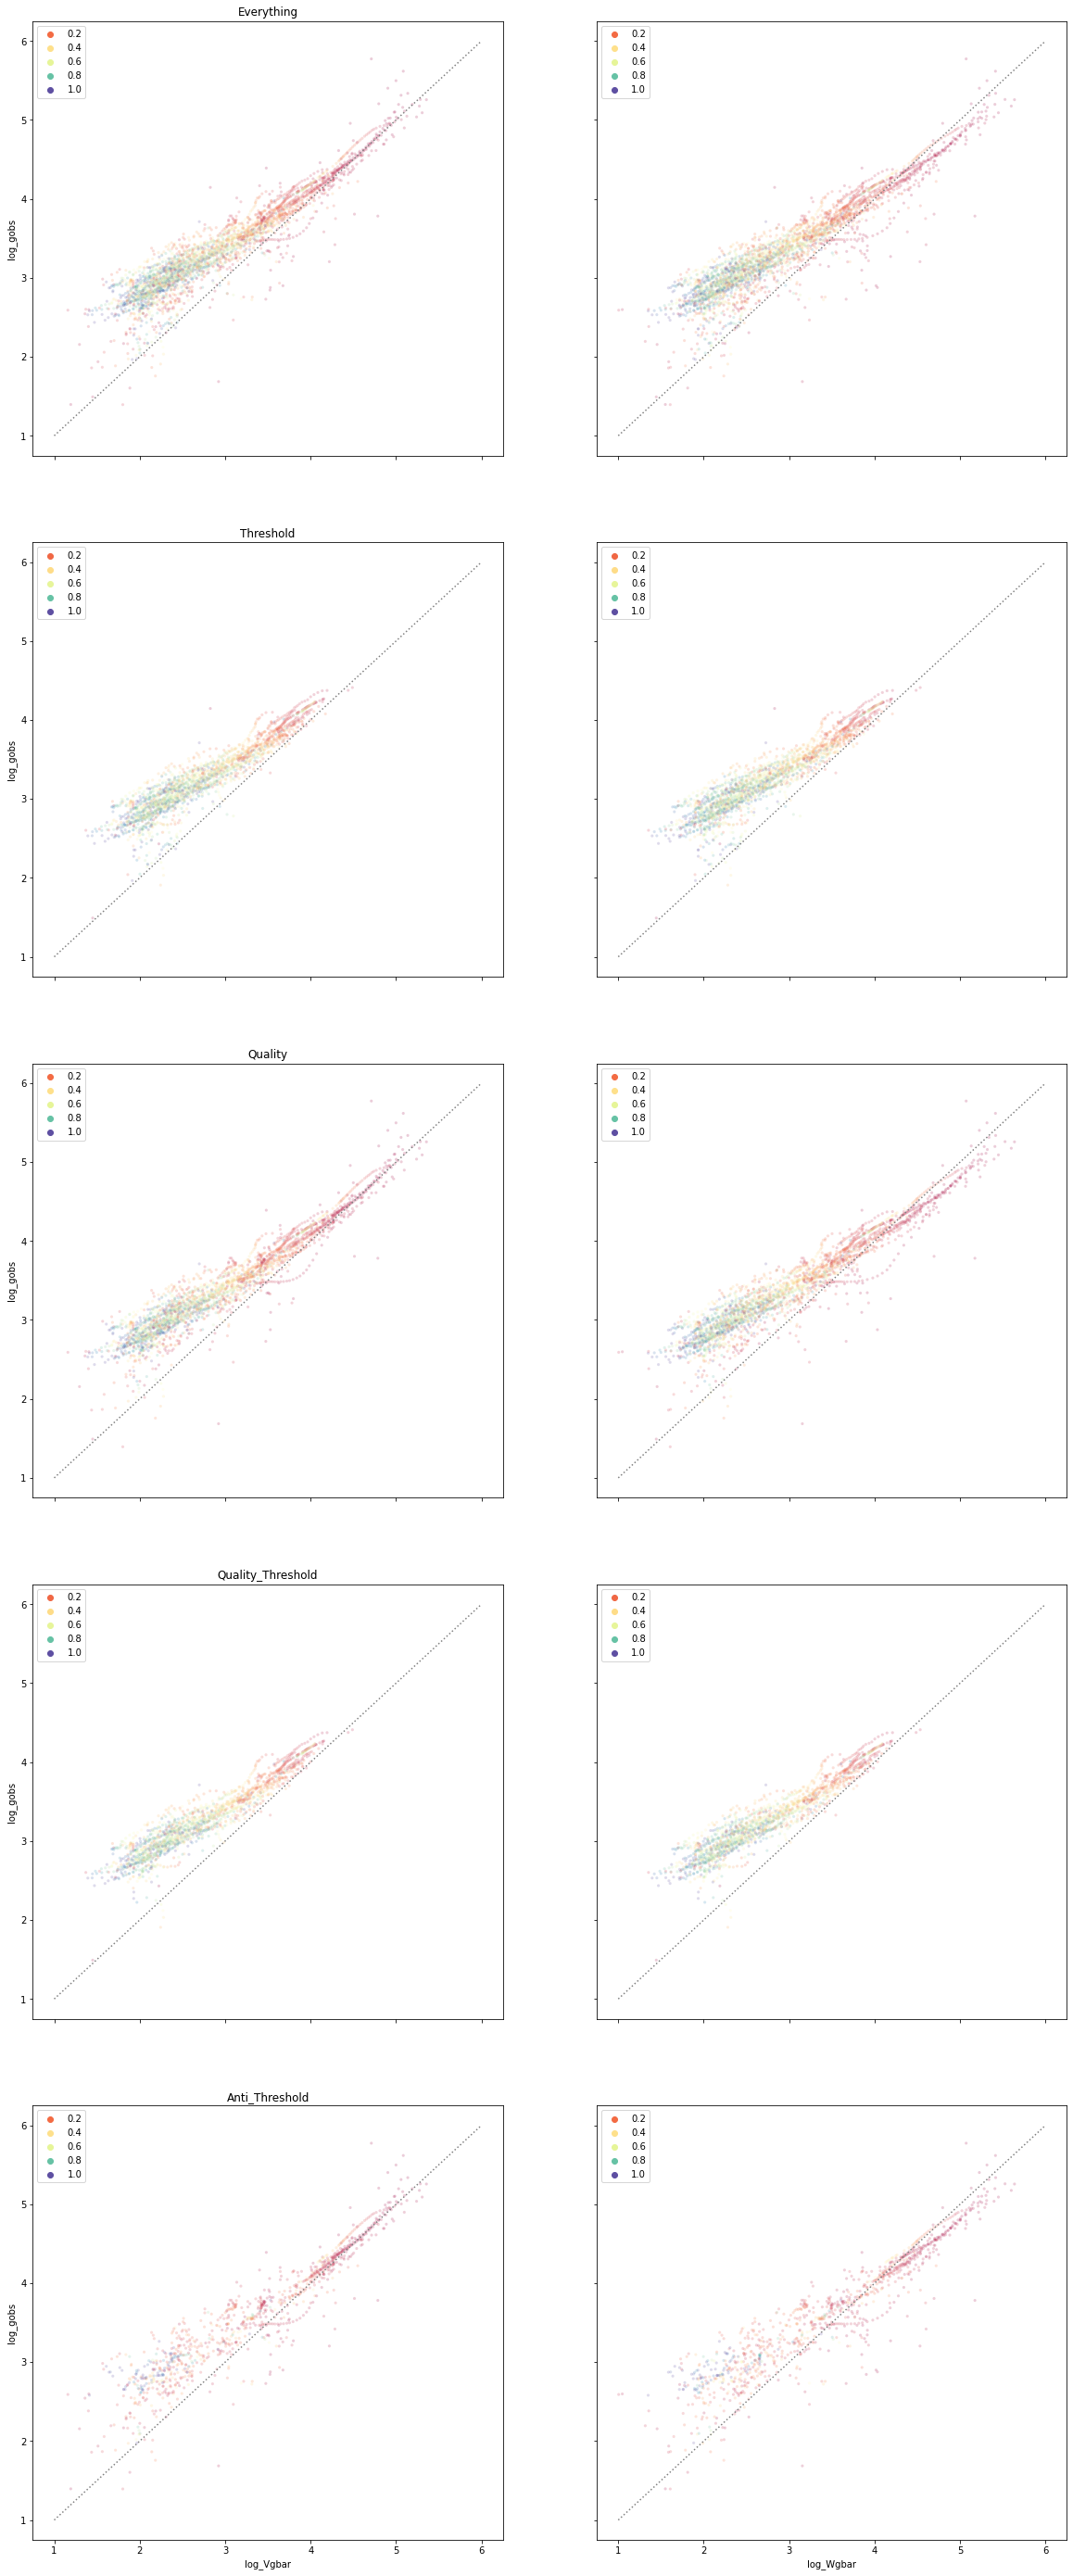

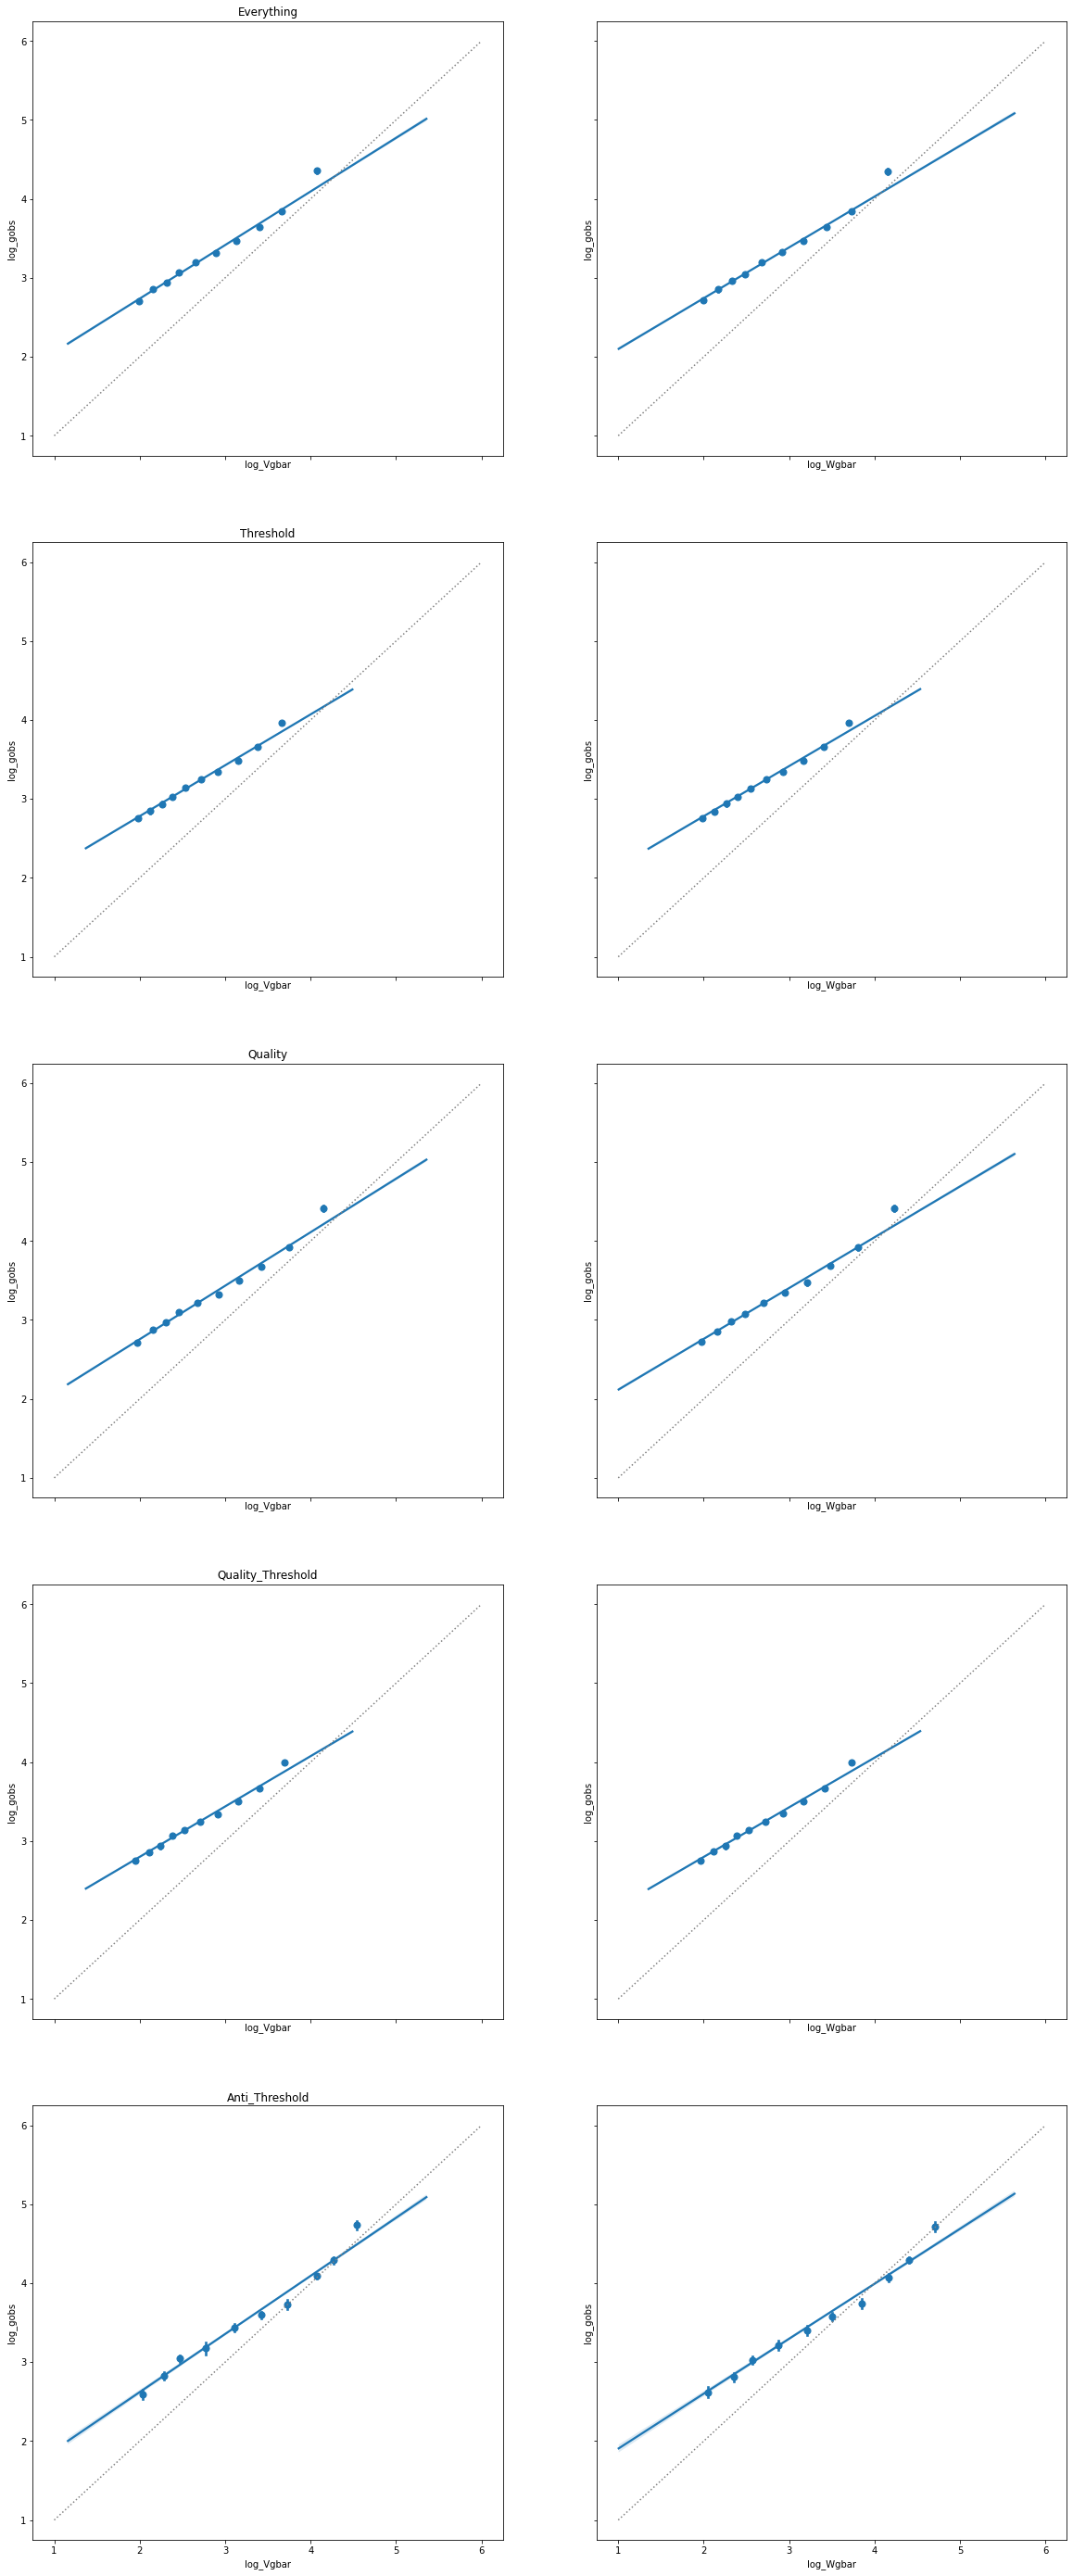

In [5]:
sparc.plot_rars()

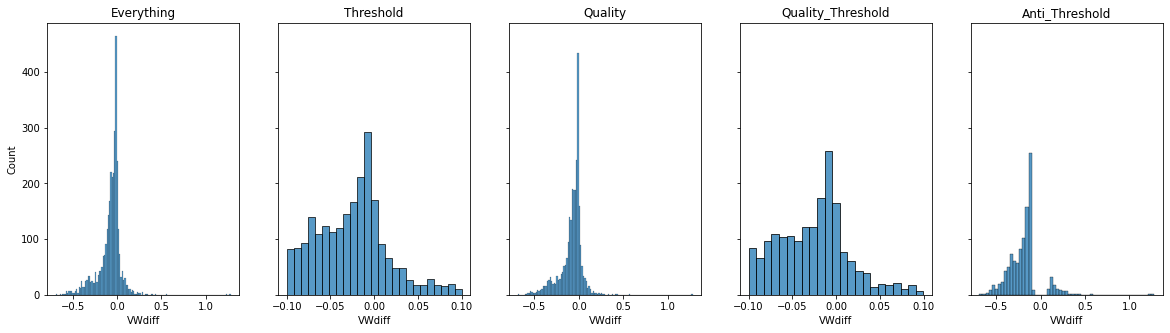

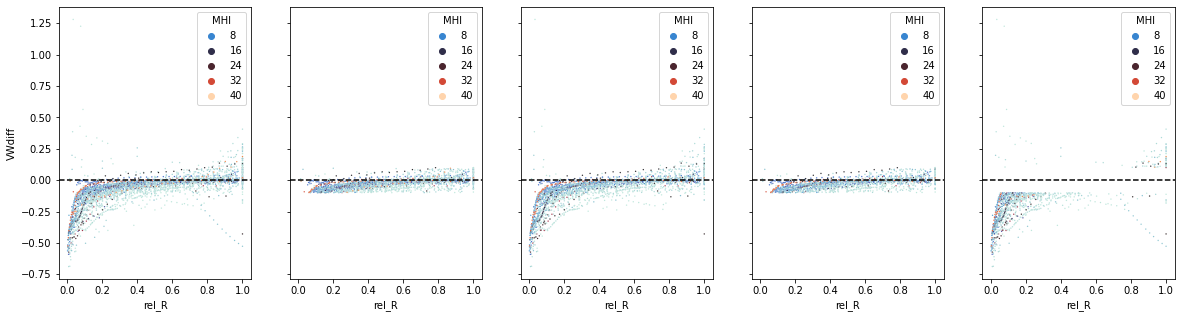

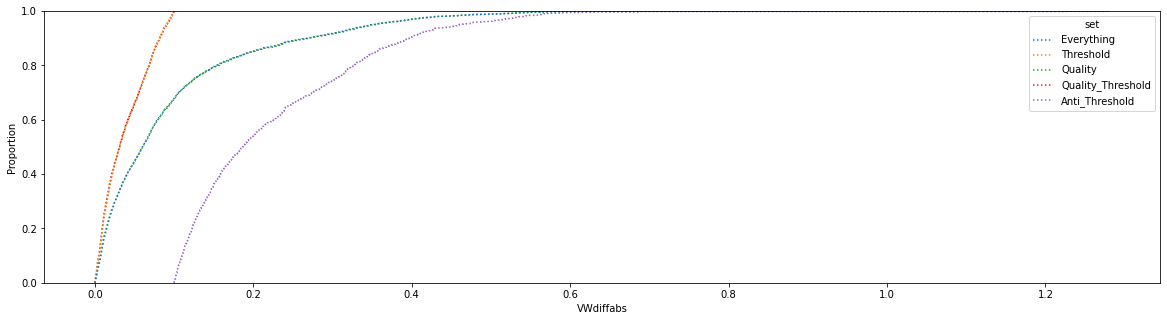

In [6]:
sparc.plot_thresholds()

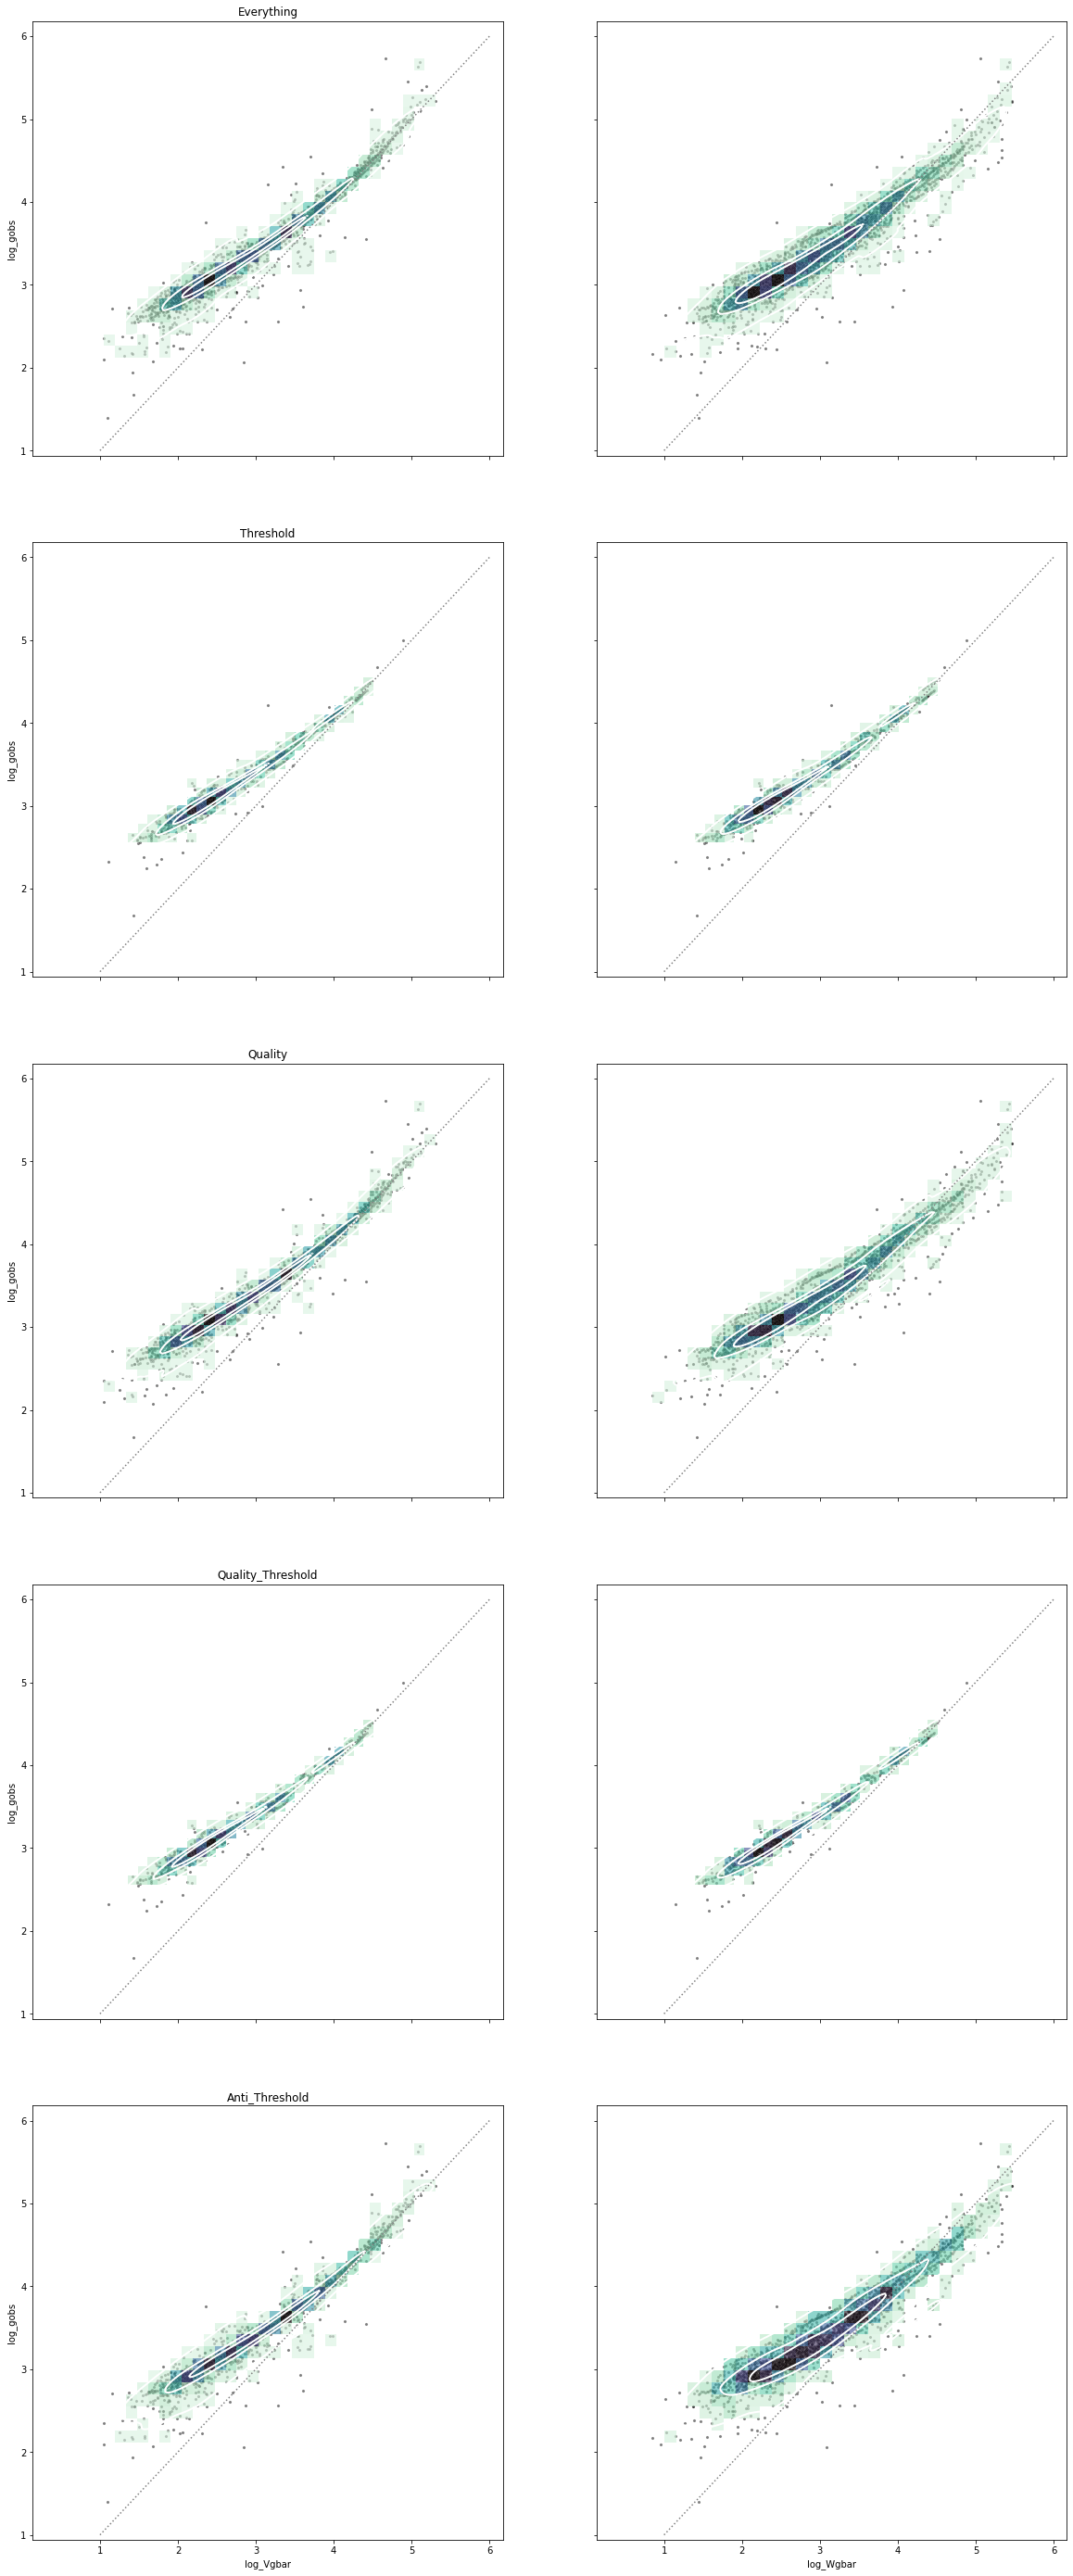

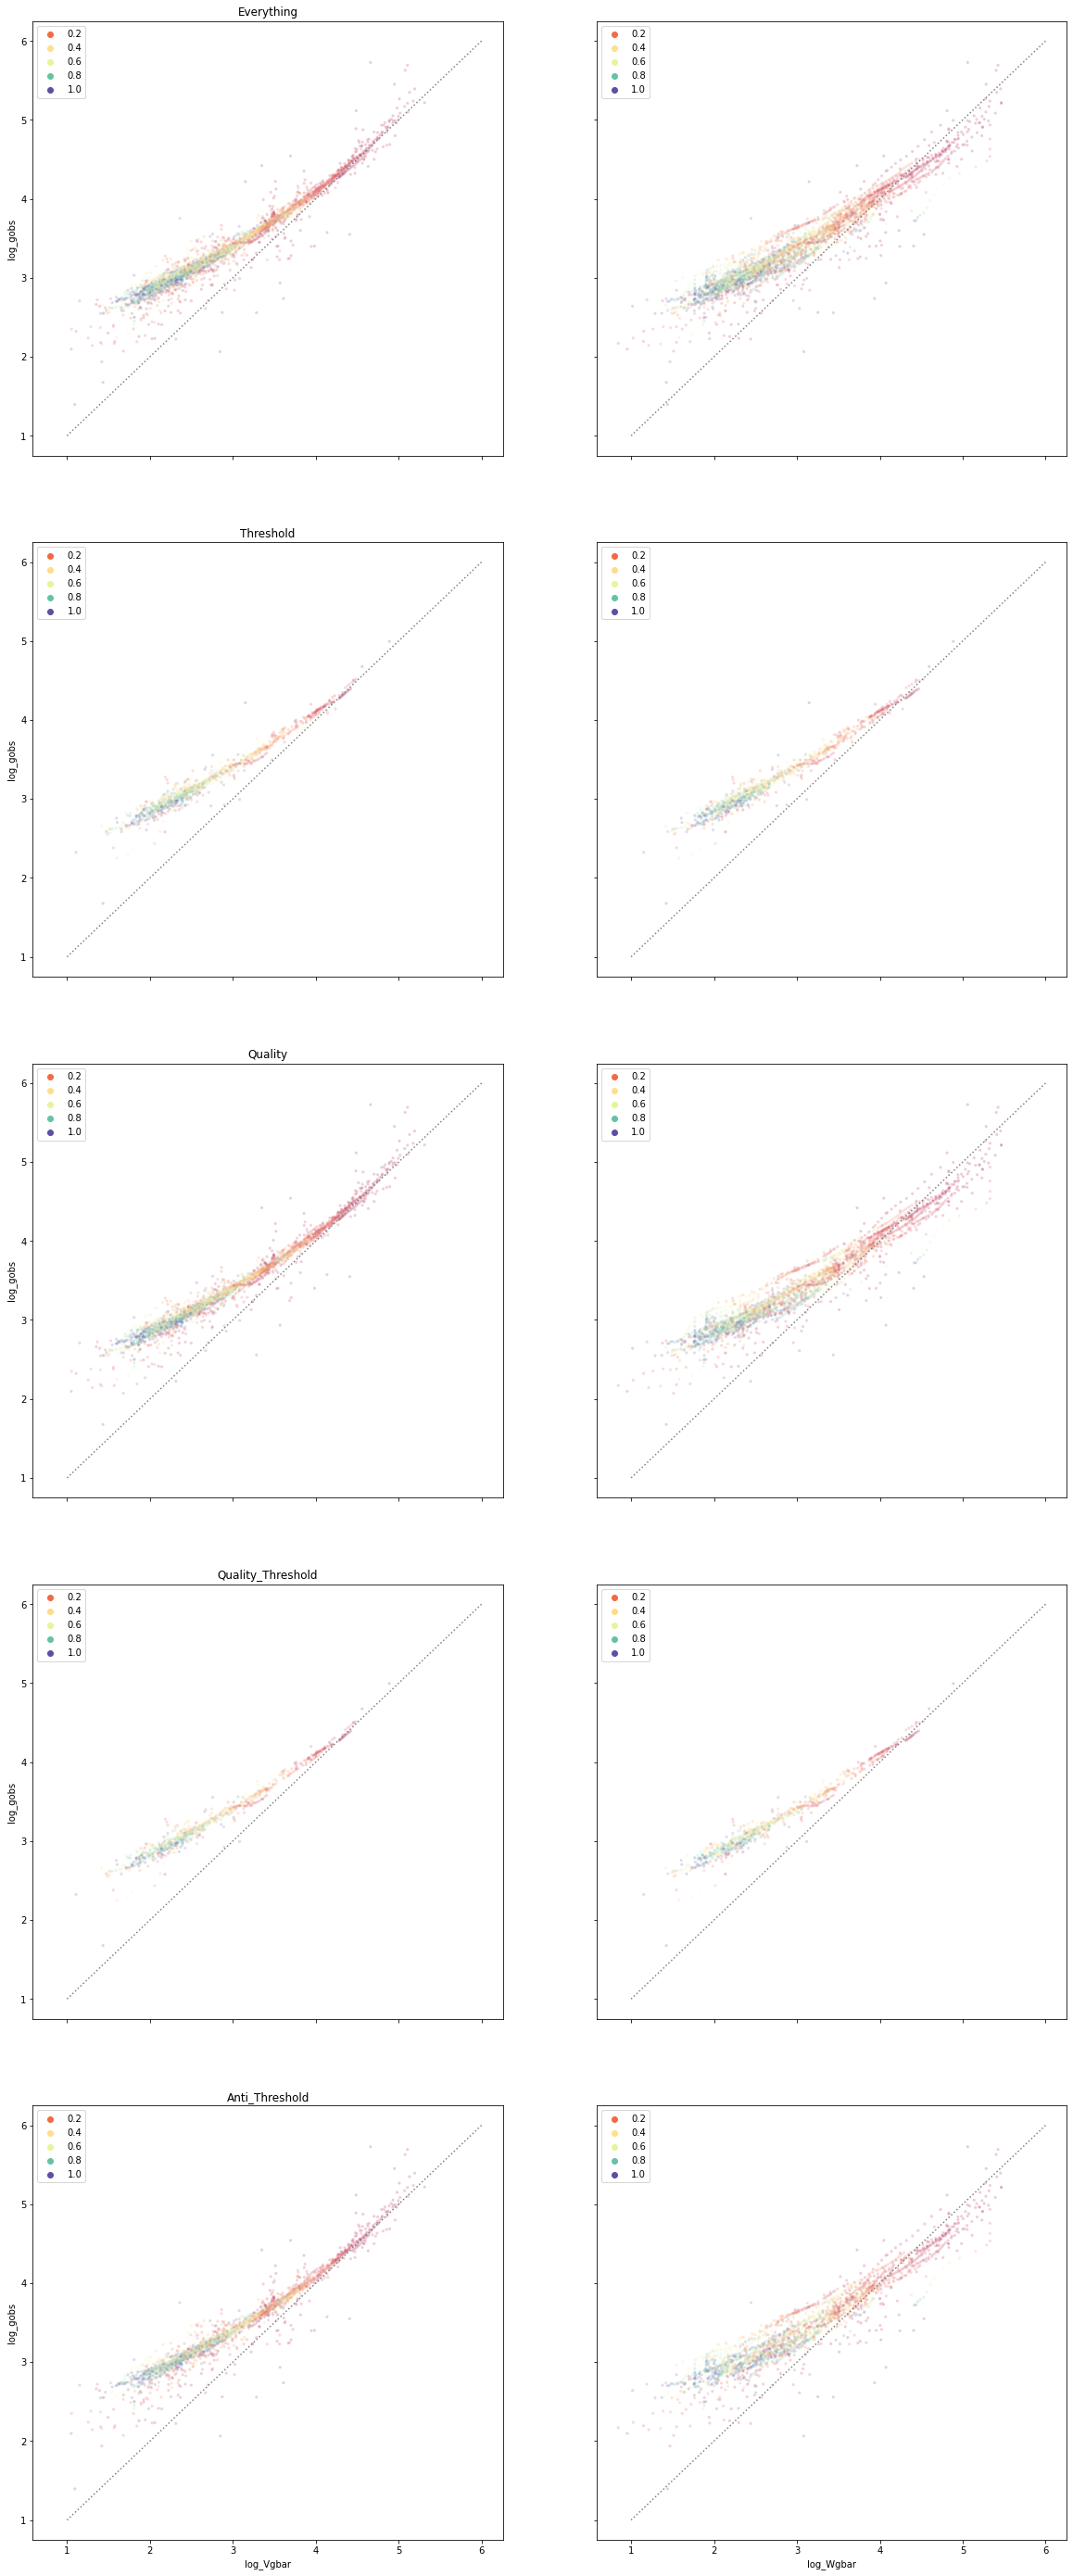

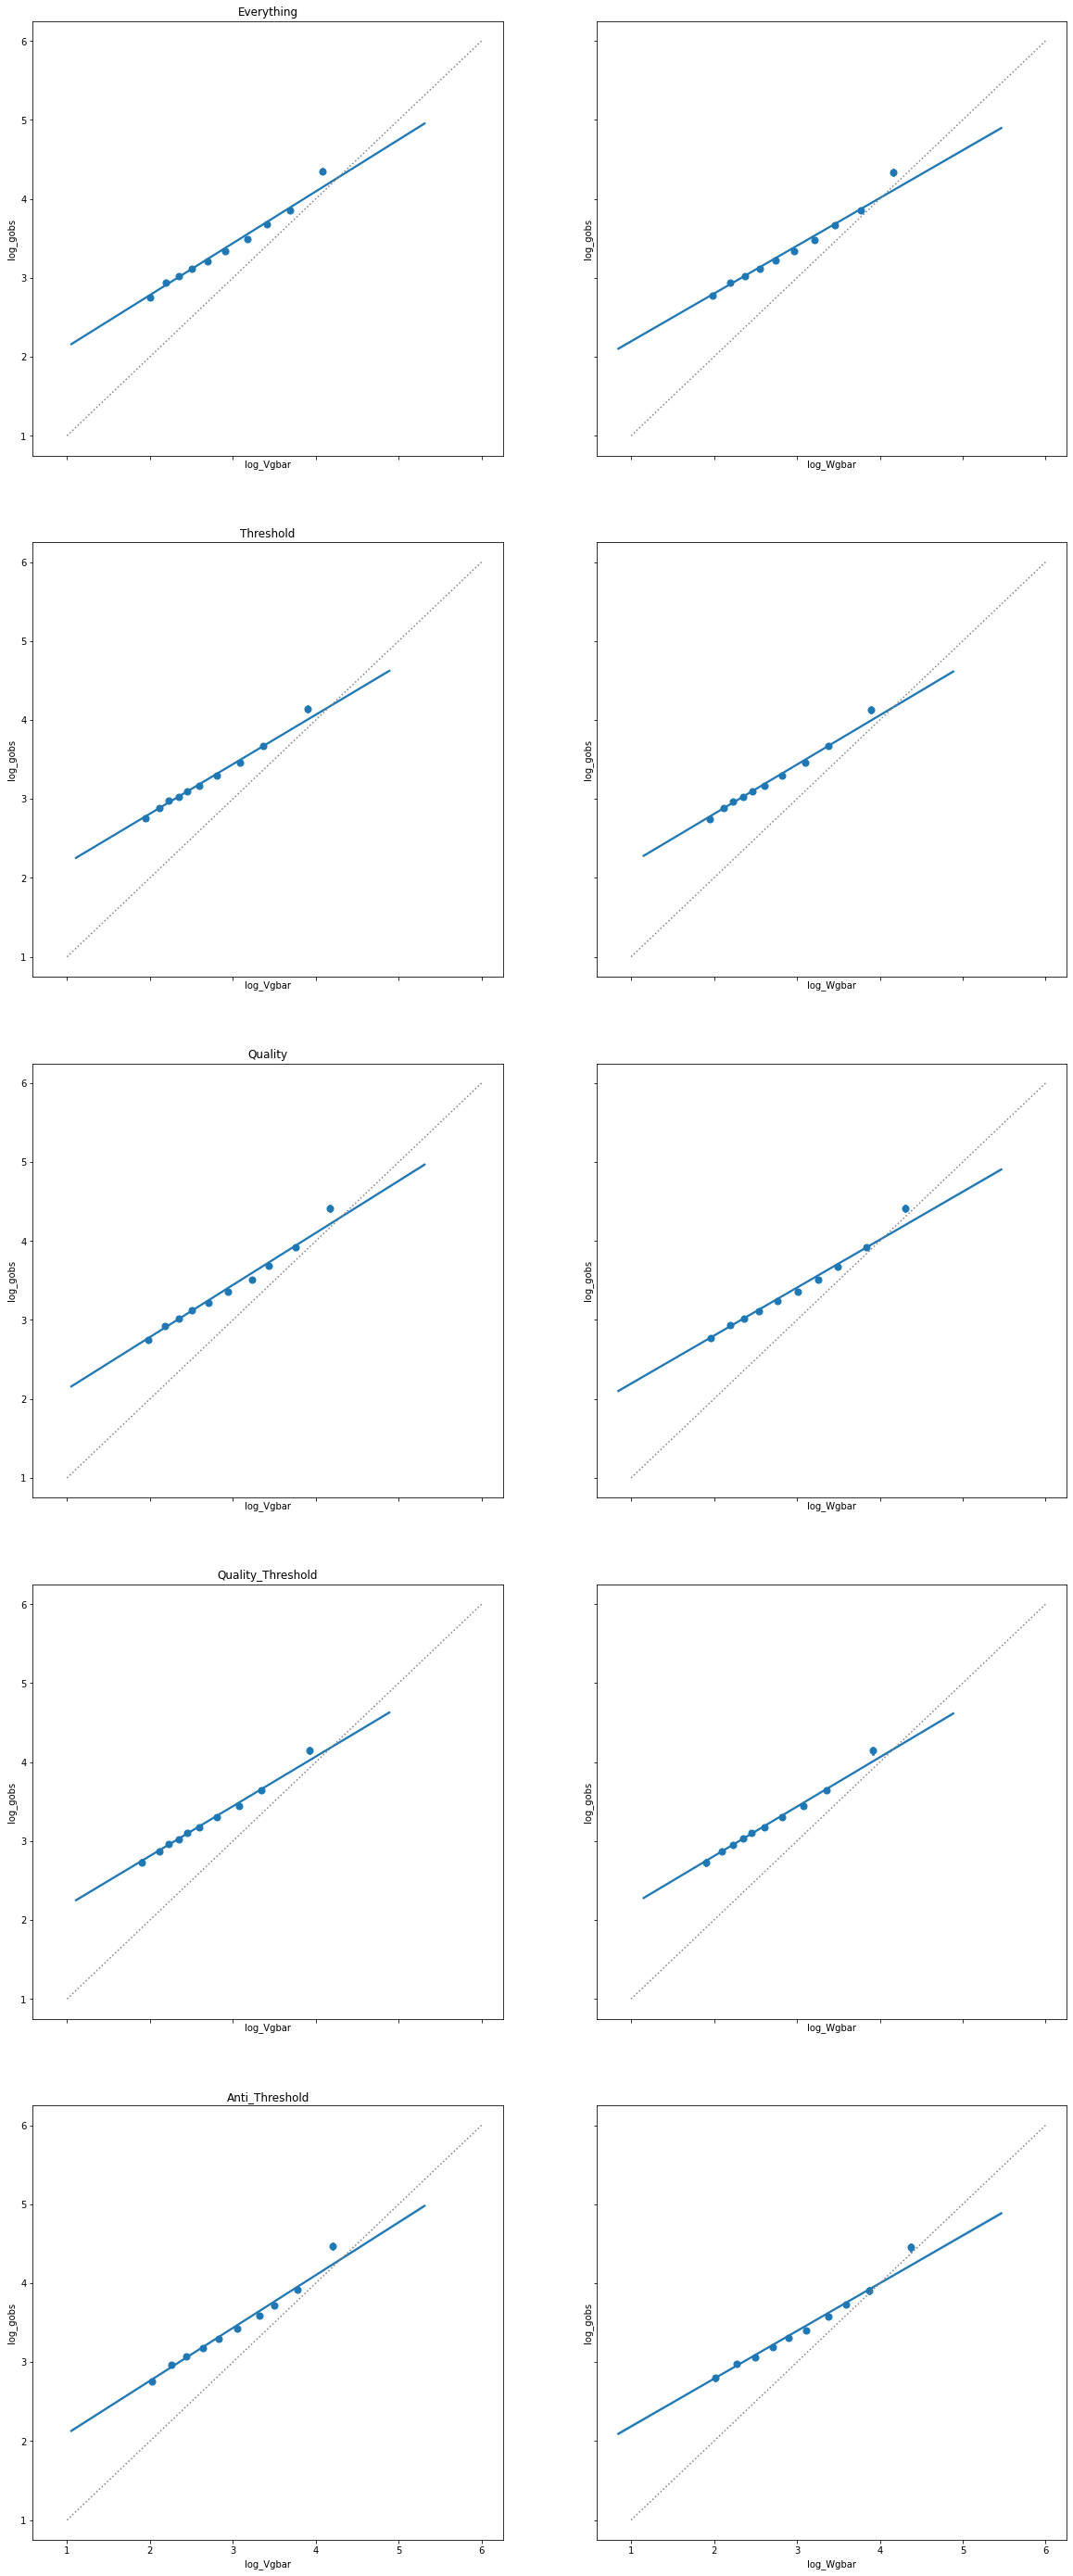

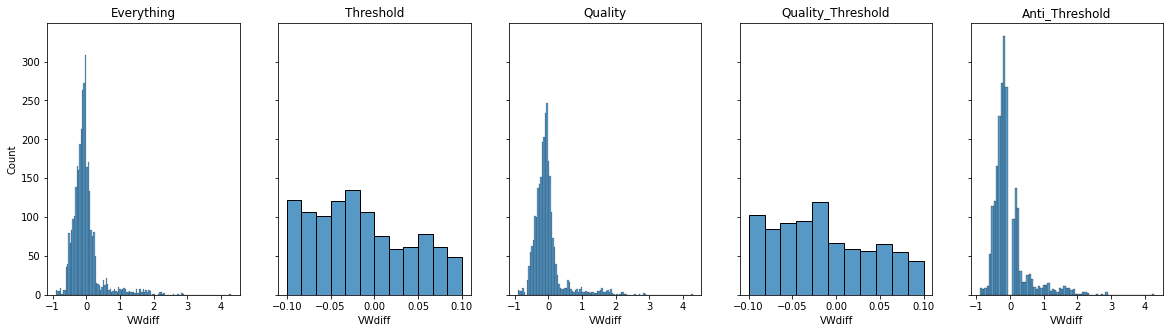

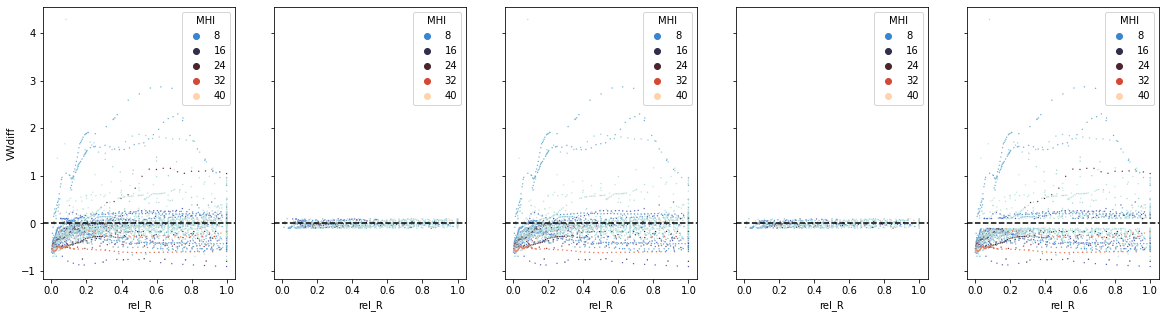

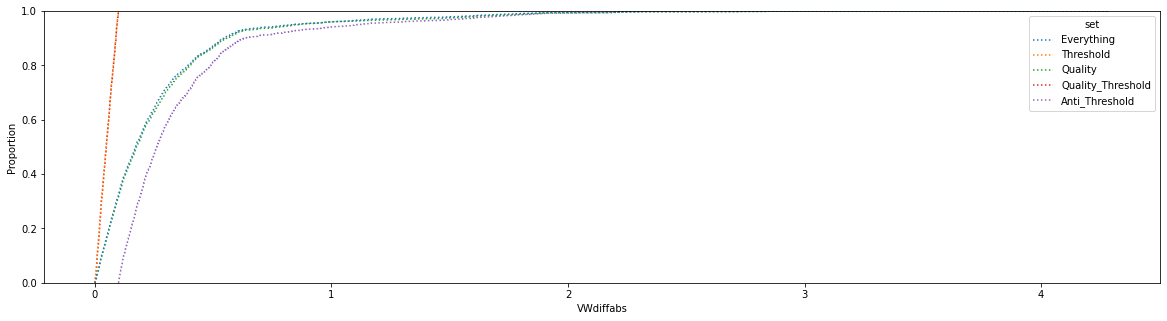

In [7]:
rar = Result(adjustments=adjs.query("Source=='RAR'"))
rar.plot_rars()
rar.plot_thresholds()


[None, None, None, None]

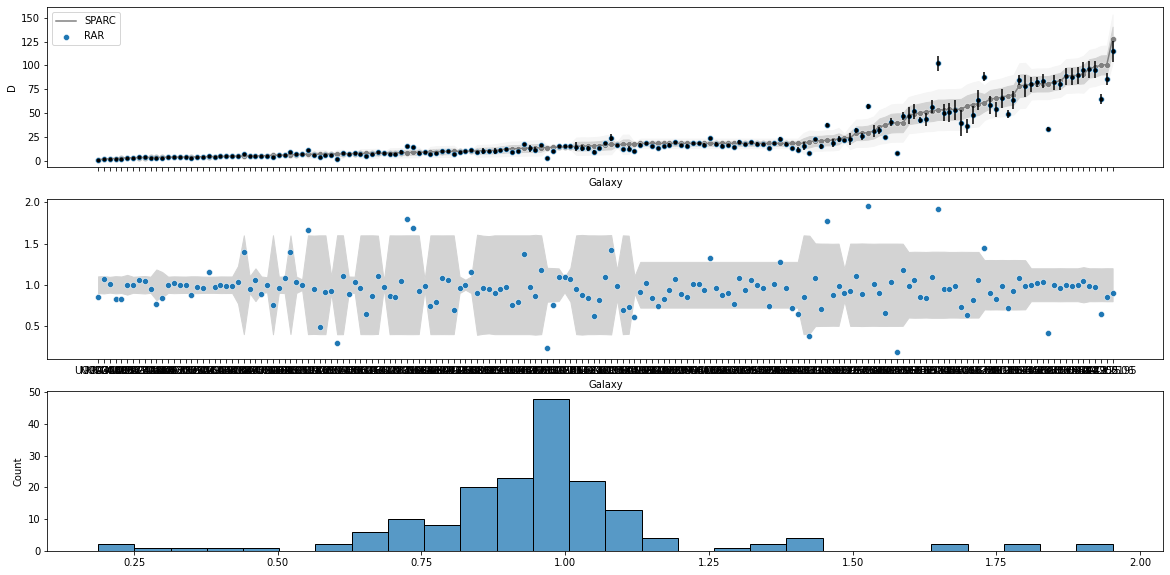

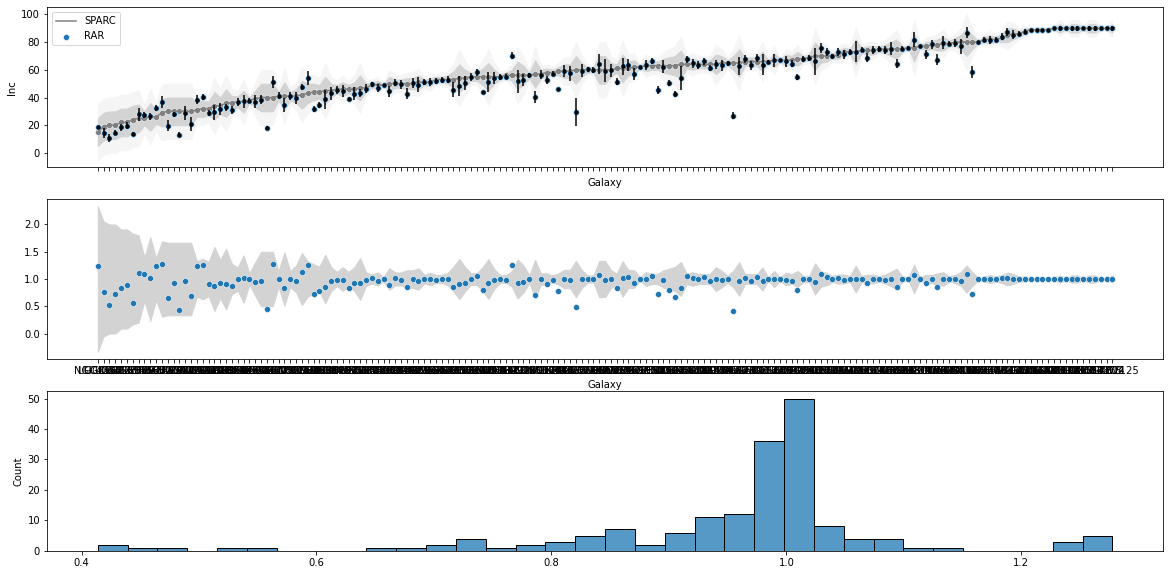

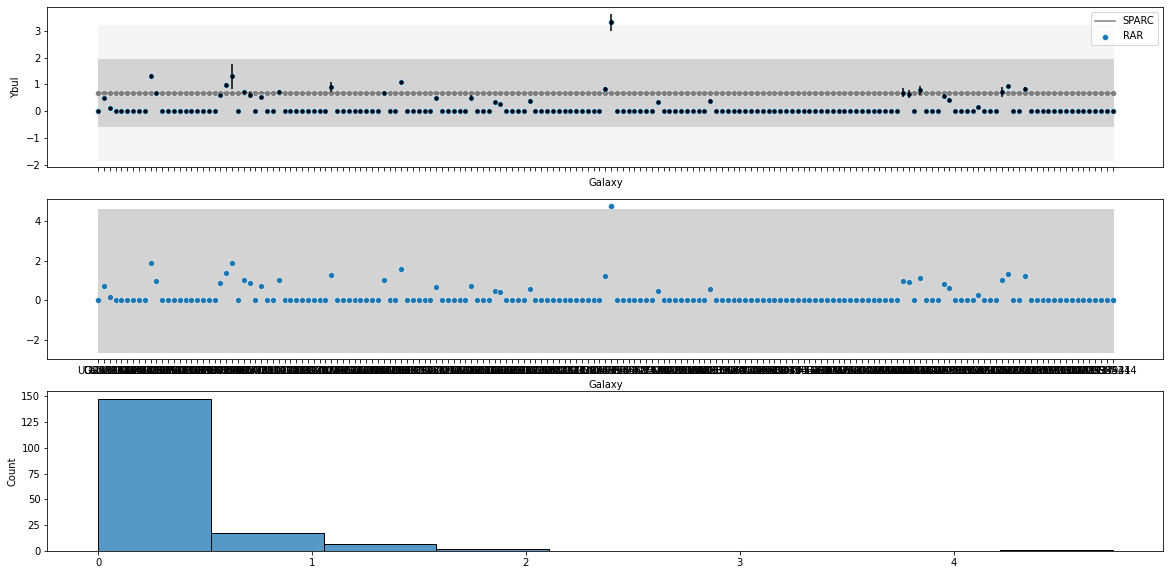

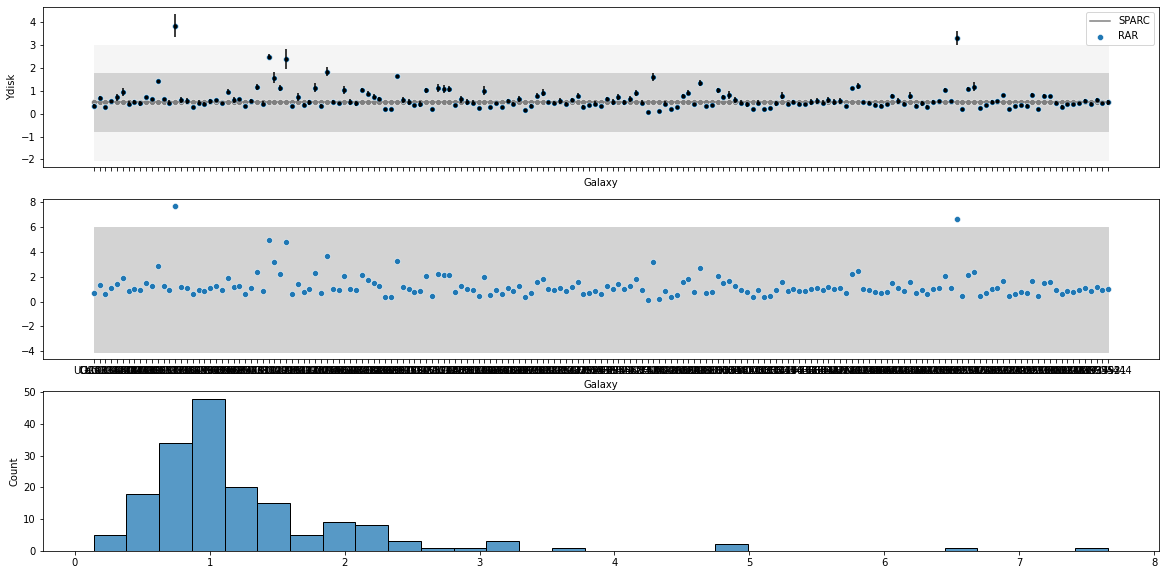

In [114]:
def plot_comparison(df, what_source, compare, to_source='SPARC', sort=None, x_sort='Galaxy'):
    fig, axes = plt.subplots(3, 1, figsize=(20,10))
    #sns.scatterplot(data=df.query('Source=="%s"' % what), x, y, label=what)
    
    # 
    ax = axes[0]
    
    # sort correctly
    to_df = df.query('Source=="%s"' % to_source).sort_values(compare)
    what_df = df.query('Source=="%s"' % what_source)
    indx = to_df.set_index(x_sort)
    indx['sort'] = np.arange(len(indx))
    what_df = what_df.join(indx[['sort']], on=x_sort).sort_values('sort')
    
    tx, ty, te = to_df[x_sort], to_df[compare], to_df["e_%s" % compare]
    ax.fill_between(tx, ty-2*te, ty+2*te, color='whitesmoke')
    ax.fill_between(tx, ty-te, ty+te, color='lightgrey')
    sns.lineplot(x=tx, y=ty, label=to_source, color='grey', ax=ax)
    sns.scatterplot(x=tx, y=ty, color='grey', ax=ax)
    
    color = 'black'
    wx, wy, we = what_df[x_sort], what_df[compare], what_df["e_%s" % compare]    
    g = sns.scatterplot(data=what_df, x=wx, y=compare, label=what_source, ax=ax)
    g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k')
    
    ax.set(xticklabels=[])
    
    
    # 
    ax = axes[1]
    yy = np.array(wy)/np.array(ty)
    ax.fill_between(tx, (ty-2*te)/ty, (ty+2*te)/ty, color='lightgrey')
    sns.scatterplot(x=tx, y=yy, ax=ax)
    ax.set(xticklabels=[])
    
    ax = axes[2]
    sns.histplot(yy, ax=ax)

[plot_comparison(adjs, 'RAR', p) for p in ['D','Inc','Ybul','Ydisk']]

In [69]:
adjs

,Inc,e_Inc,D,e_D,Galaxy,f_D,Ydisk,e_Ydisk,Ybul,e_Ybul,Source
0,65.0,5.0,3.36,0.26,CamB,2.0,0.50,1.258925,0.7,1.258925,SPARC
1,56.0,10.0,15.20,4.56,D512-2,1.0,0.50,1.258925,0.7,1.258925,SPARC
2,63.0,7.0,8.79,0.28,D564-8,2.0,0.50,1.258925,0.7,1.258925,SPARC
3,59.0,3.0,7.72,0.18,D631-7,2.0,0.50,1.258925,0.7,1.258925,SPARC
4,60.0,5.0,6.80,2.04,DDO064,1.0,0.50,1.258925,0.7,1.258925,SPARC
...,...,...,...,...,...,...,...,...,...,...,...
345,45.5,2.7,2.14,0.14,UGC07577,NaN,0.24,0.050000,0.0,0.000000,RAR
346,42.5,2.4,8.69,0.28,D564-8,NaN,0.40,0.090000,0.0,0.000000,RAR
347,72.8,3.1,3.35,0.12,NGC3741,NaN,0.31,0.050000,0.0,0.000000,RAR
348,53.0,2.9,2.55,0.22,UGC04483,NaN,0.43,0.100000,0.0,0.000000,RAR
